### In this notebook we created the Exploratory Data Analysis -- EDA --

In [1]:
# Constants
DATA_PATH = '../data/raw/train_users_2.csv'
EXPORT_PATH = "../data/processed/1_preprocessed_df.pkl"
EXPORT_PATH2 = "../data/processed/2_preprocessed_df.pkl"

In [2]:
# Load packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import pickle

In [3]:
# Read Data 
raw_df = pd.read_pickle(EXPORT_PATH2)

In [4]:
df = raw_df.copy()

### Uni-Variate Visualization

count    213451.000000
mean         36.014767
std          10.786017
min          18.000000
25%          32.000000
50%          34.000000
75%          35.000000
max         115.000000
Name: age, dtype: float64


C:\Users\Mahmoud Khattab\AppData\Local\Temp\ipykernel_8772\1356988072.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age.dropna())


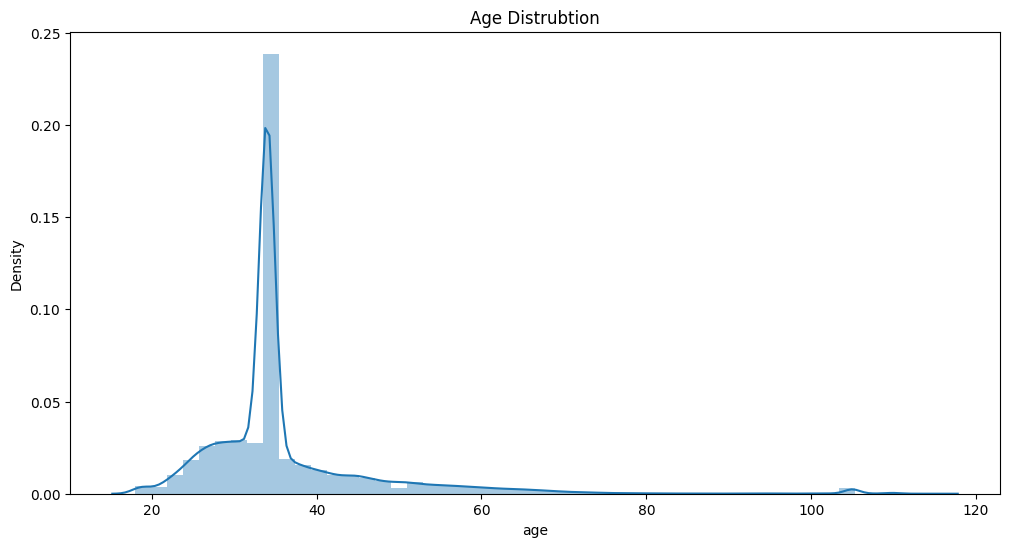

In [5]:
print(df['age'].describe())

plt.figure(figsize=(12,6))
sns.distplot(df.age.dropna())
plt.title('Age Distrubtion')
plt.show()

In [6]:
print(len(df[df['age'] > 120]))
print(len(df[df['age'] < 18]))

0
0


C:\Users\Mahmoud Khattab\AppData\Local\Temp\ipykernel_8772\917621387.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df['signup_flow']);


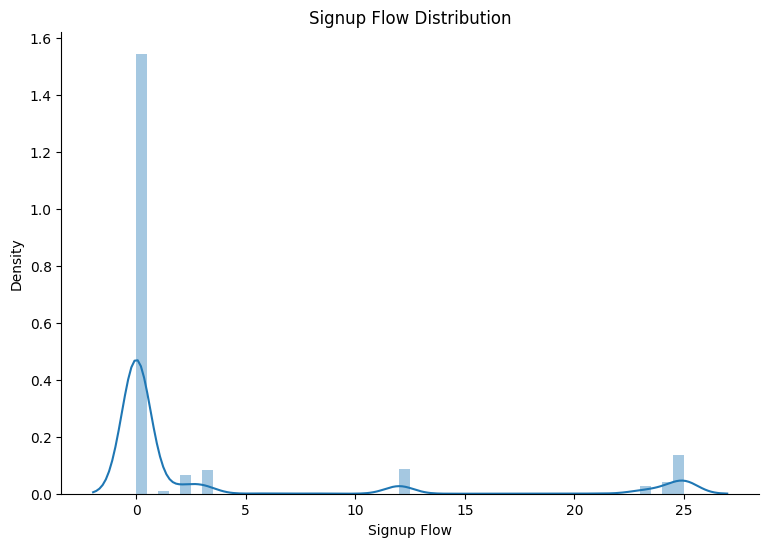

In [7]:
plt.figure(figsize=(9,6))
sns.distplot(x = df['signup_flow']);
plt.xlabel('Signup Flow')
plt.title('Signup Flow Distribution')
sns.despine();

C:\Users\Mahmoud Khattab\AppData\Local\Temp\ipykernel_8772\1787167197.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age.dropna())


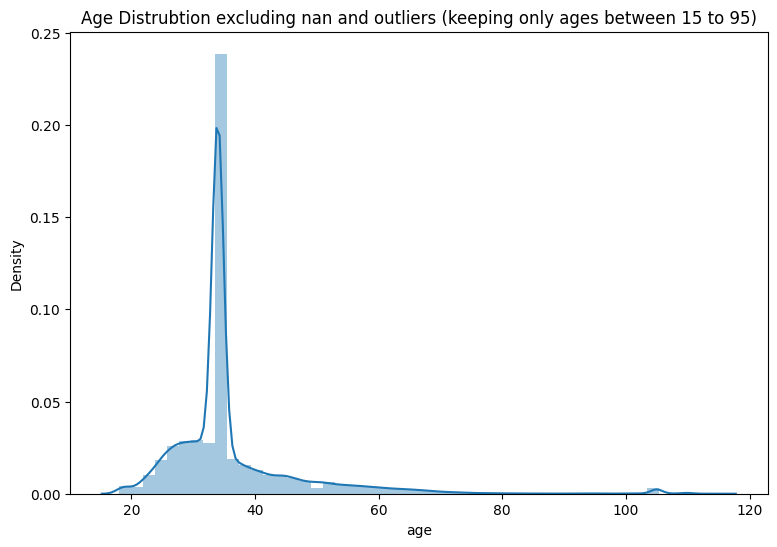

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


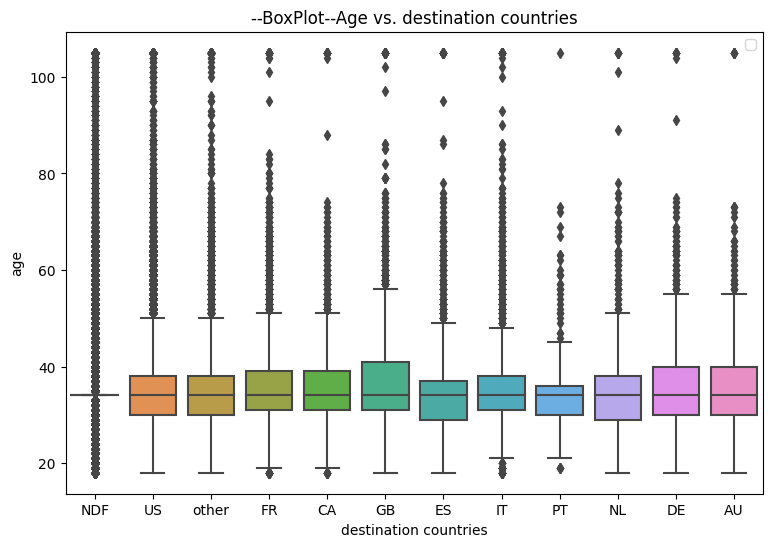

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


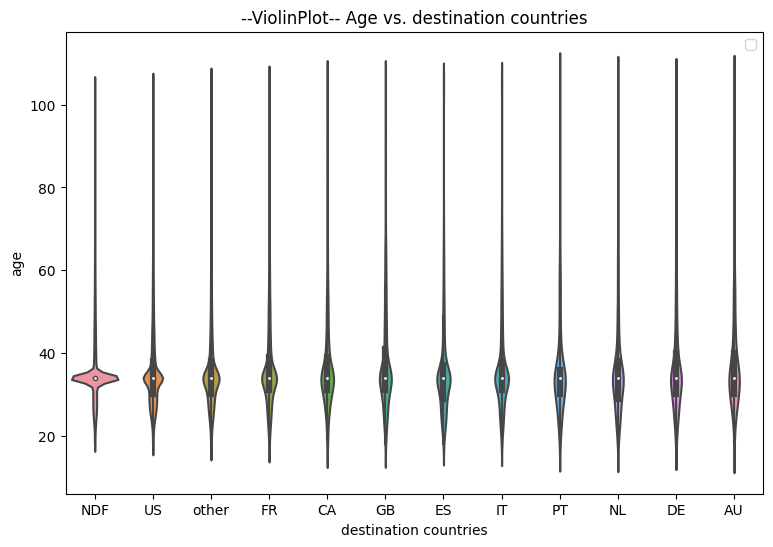

In [8]:
plt.figure(figsize=(9,6))
sns.distplot(df.age.dropna())
plt.title('Age Distrubtion excluding nan and outliers (keeping only ages between 15 to 95)')
plt.show()

df.loc[(df.age > 105) | (df.age < 15), 'age'] = np.nan
plt.figure(figsize=(9,6))
sns.boxplot(x='country_destination',y='age', data=df.dropna())
plt.xlabel('destination countries')
plt.title('--BoxPlot--Age vs. destination countries')
plt.legend()
plt.show()

df.loc[(df.age > 105) | (df.age < 15), 'age'] = np.nan
plt.figure(figsize=(9,6))
sns.violinplot(x='country_destination',y='age', data=df.dropna())
plt.xlabel('destination countries')
plt.title('--ViolinPlot-- Age vs. destination countries')
plt.legend()
plt.show();

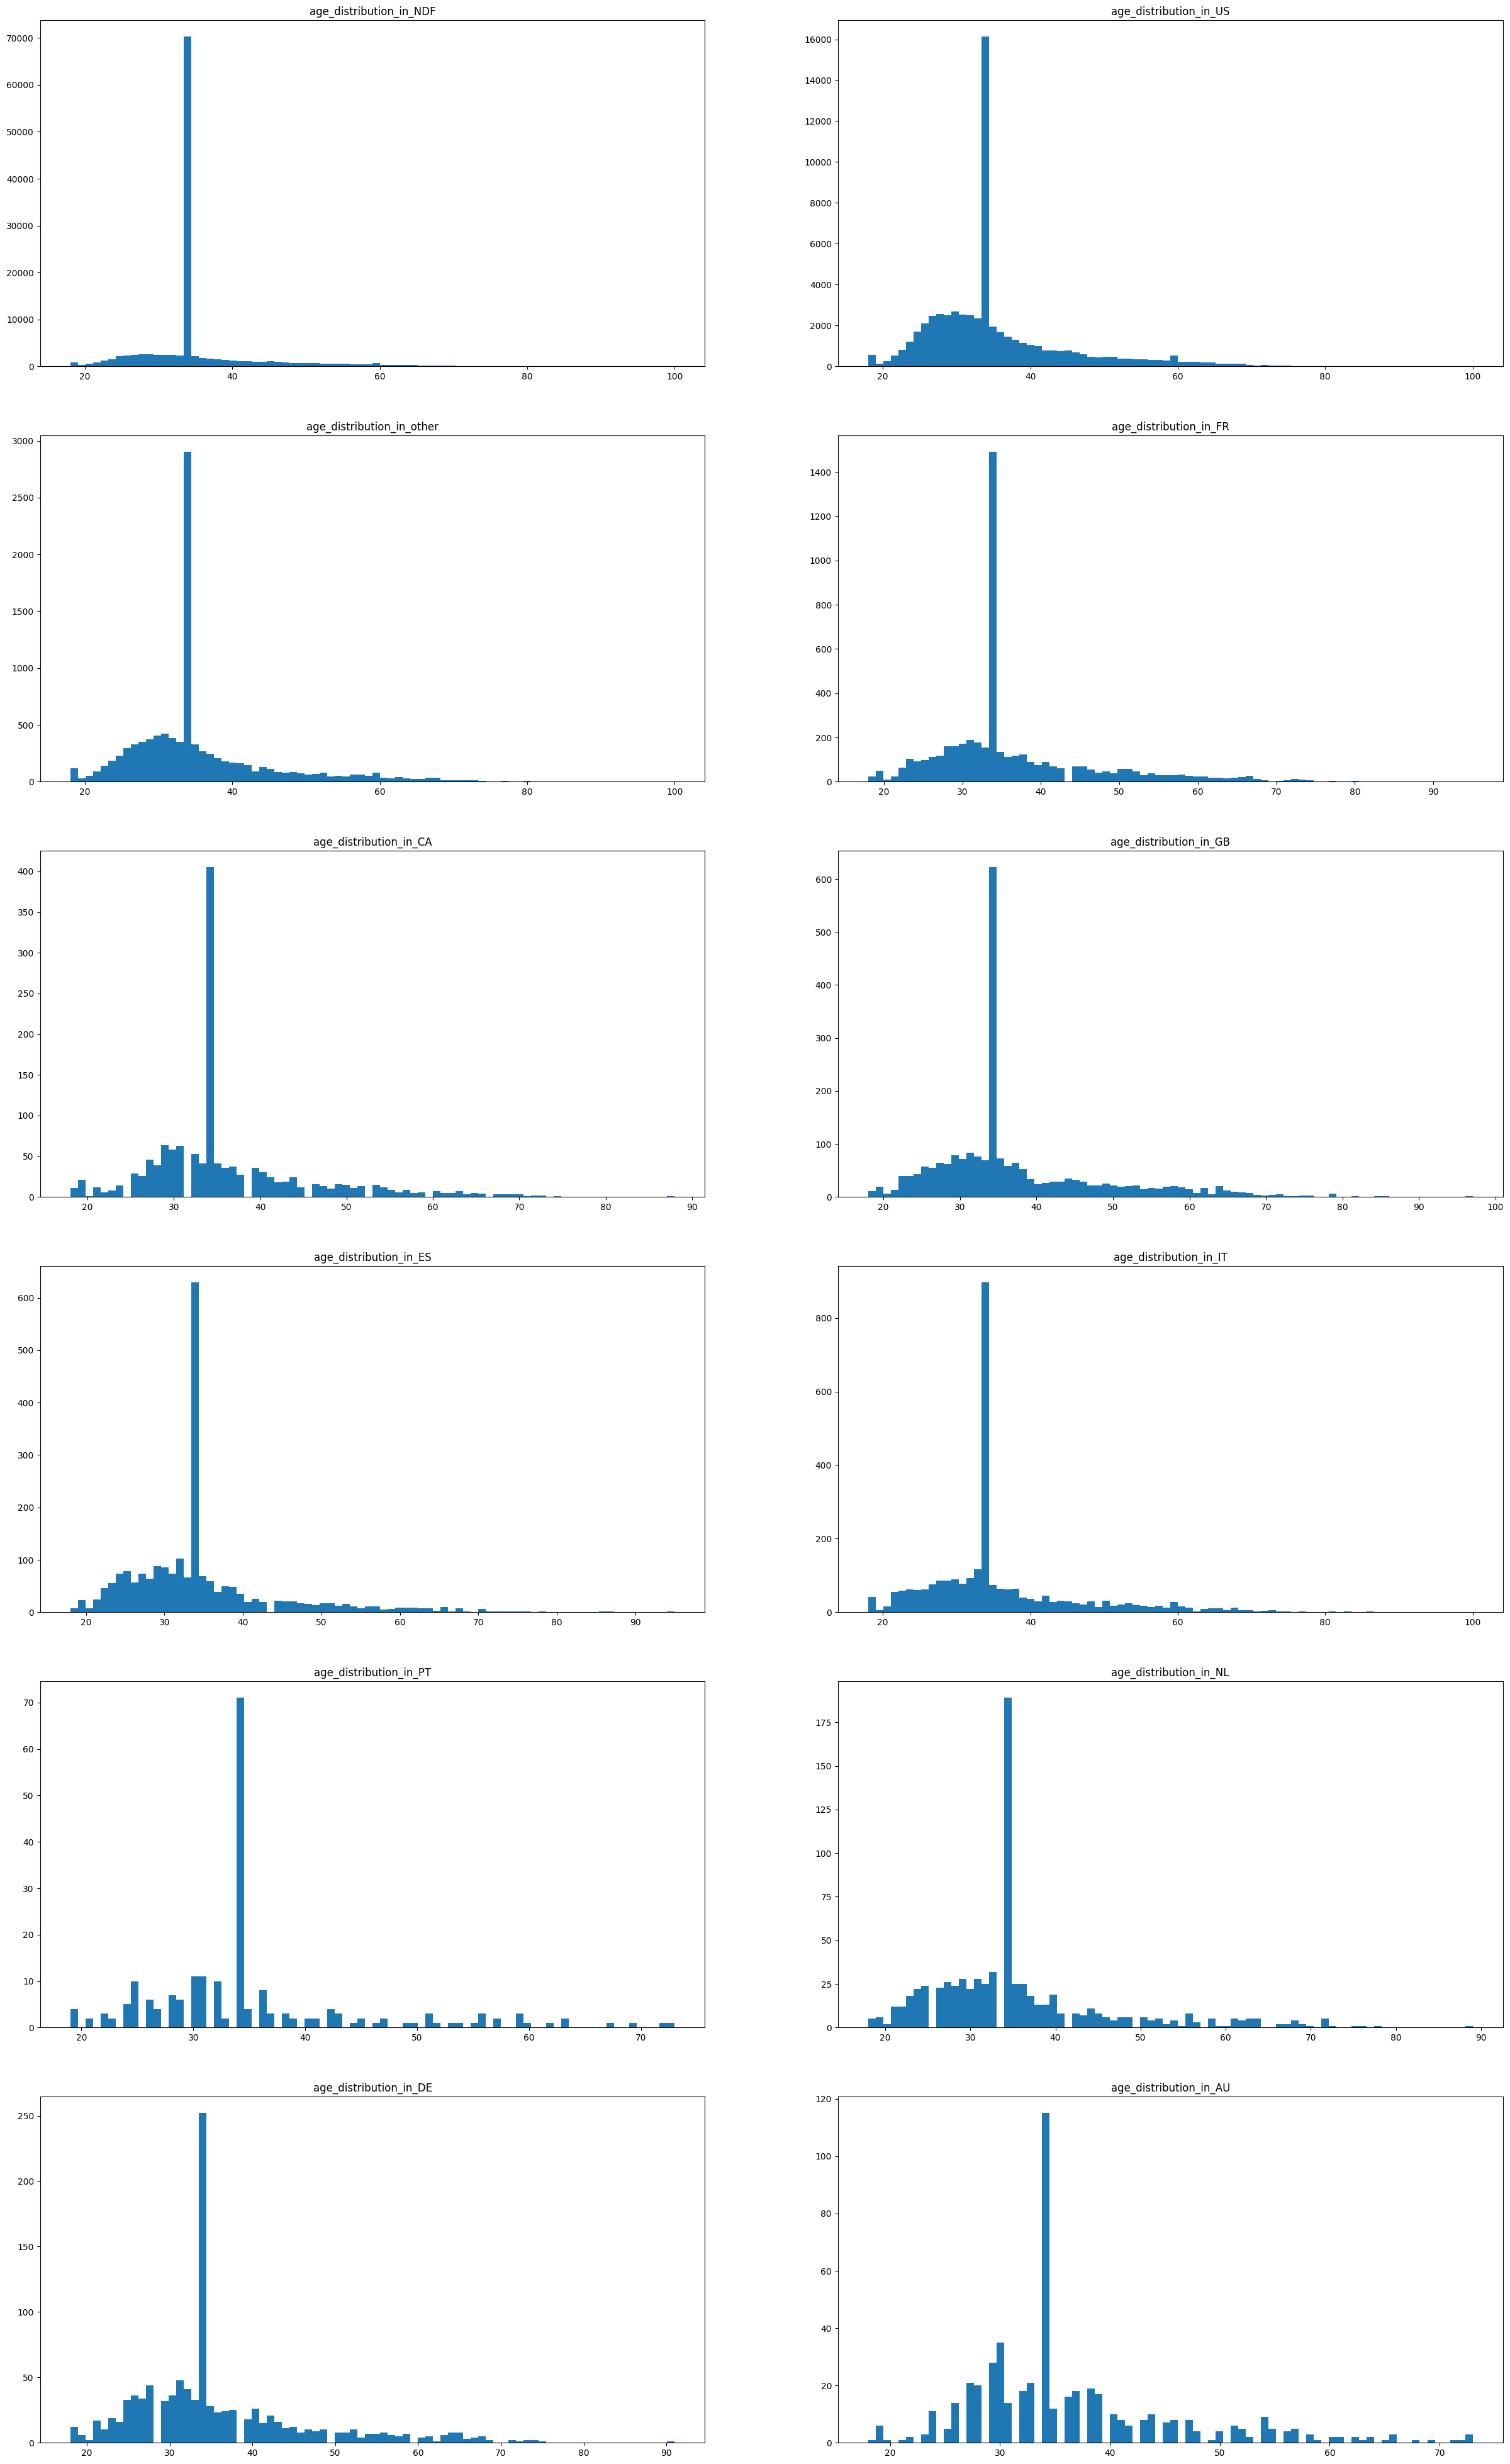

In [9]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(30, 50))
i=0
j=0

#for col_cnts_df_list in ls_of_column_counts_df_lists[0:2]:
for country in df['country_destination'].unique():
    axes[i, j].hist(df[(df['age']<=100) & (df['country_destination']== country)]['age'], bins=80)
    axes[i, j].set_title('age_distribution_in_{}'.format(country))
    if(j<1):
        j+=1
    else:
        i+=1
        j=0
plt.xticks()
plt.show()

### Bi-Variate Analysis

In [10]:
#add colores for plot bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] 

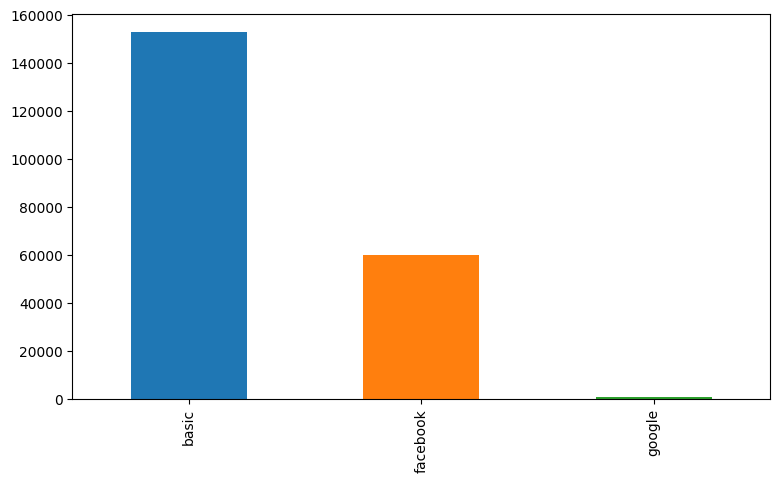

In [11]:
plt.figure(figsize = (9,5))
df.signup_method.value_counts(dropna=False).plot(kind='bar', color = colors);

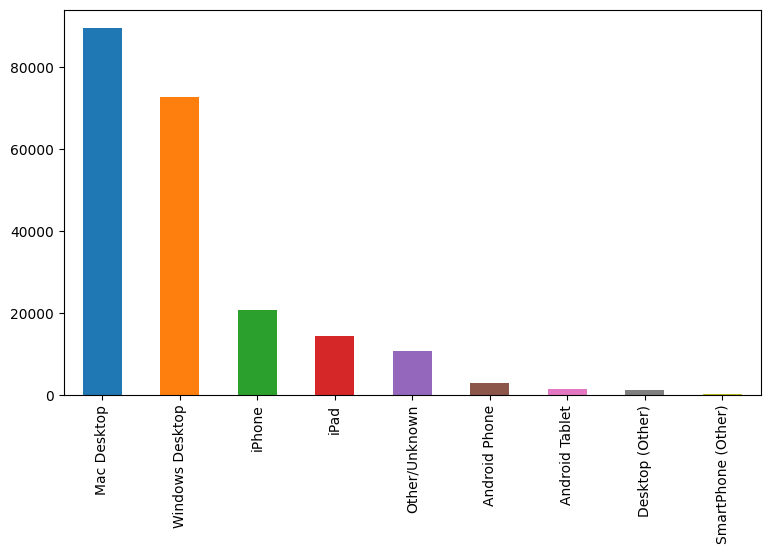

In [12]:
plt.figure(figsize = (9,5))
df.first_device_type.value_counts(dropna=False).plot(kind='bar', color=colors);

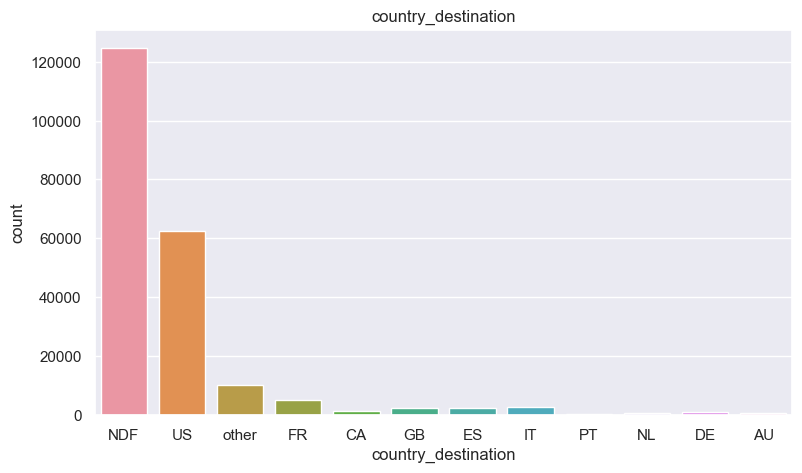

In [13]:
# destination country share

plt.figure(figsize=(9,5))

sns.set(style="darkgrid")

ax = sns.countplot(x="country_destination", data=df)

plt.title("country_destination")

plt.show()

#### Multi-variate Analysis and Visualization

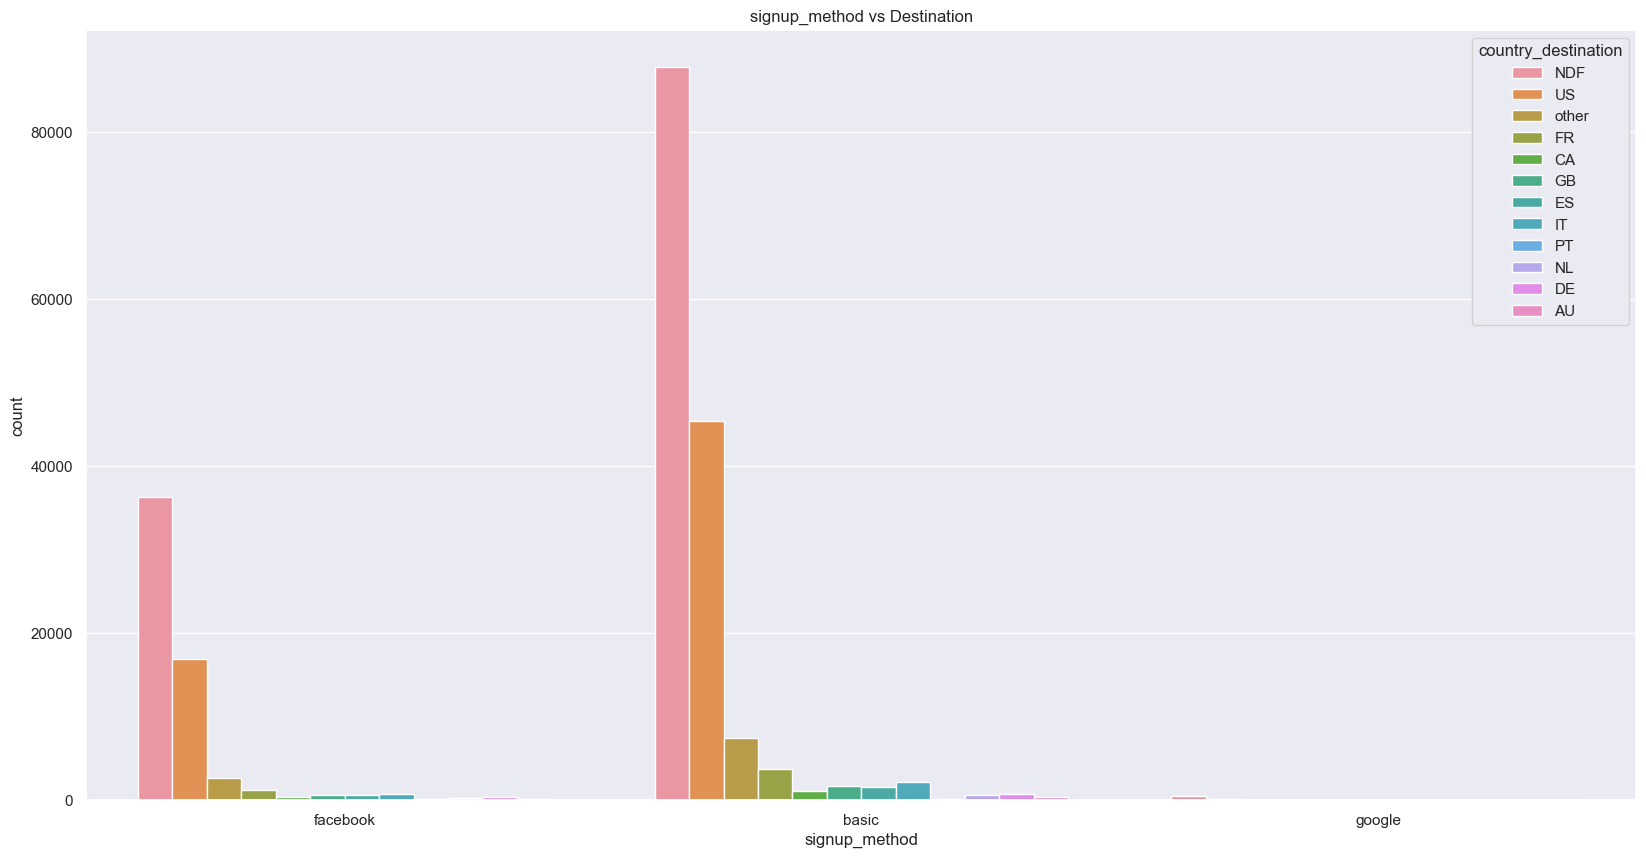

In [14]:
# signup_method share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="signup_method", hue="country_destination", data=df)

plt.title("signup_method vs Destination")

plt.show();

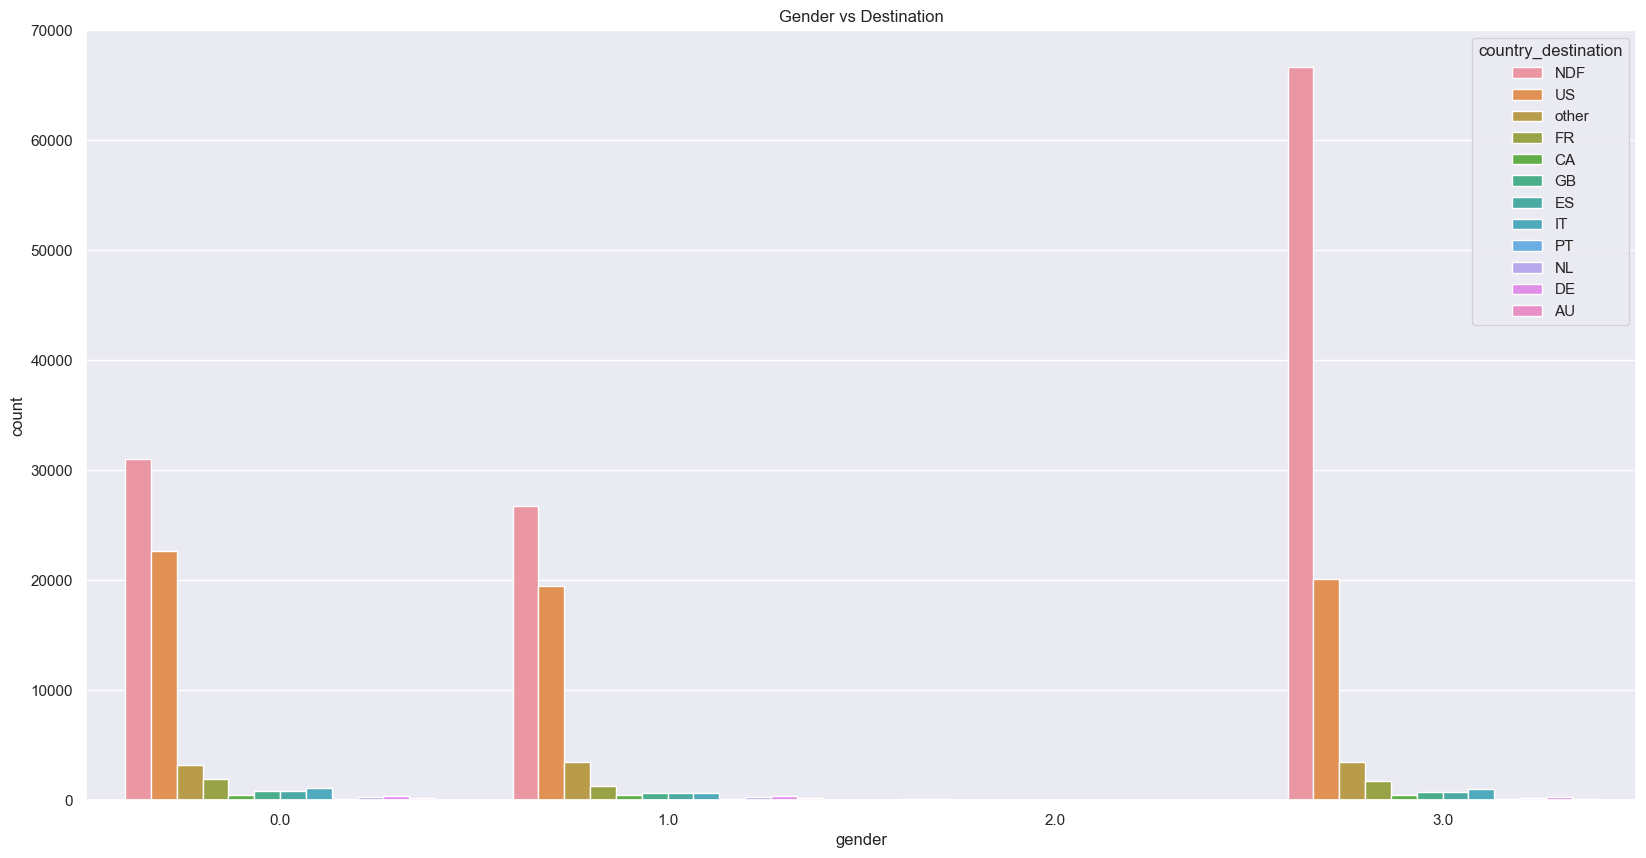

In [15]:
# gender share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="gender", hue="country_destination", data=df)

plt.title("Gender vs Destination")

plt.show()